<div style="text-align: right"> <h1> <b> FIT1043 Introduction to Data Science </b> </h1>  </div>
<div style="text-align: right"> <h1> <b> Assignment 2 </b> </h1>  </div>

<div style="text-align: right"> <h3> Kuah Jia Chen  </h3>  </div>
<div style="text-align: right"> <h3> 32286988  </h3>  </div>

<hr style="height:3px;border-width:0;color:gray;background-color:gray">

# Introduction
The objective of this assignment is to conduct predictive analytics, by using Support Vector Machine/ Regression with a dataset provided by using Python in the Jupyter Notebook environment. The dataset is “FIT1043-Essay-Features.csv”. The main purpose of this assignment is to make use of the dataset to predict the student's scores on essays based on their essay features. In order to achieve this, firstly, I would perform a train-test split, feature engineering, normalization, model fitting, and eventually evaluate the performance of the model created by using accuracy, quadratic weighted kappa, and confusion matrix. Afterward, the model created would be used to predict the essay score for another dataset and submit the result to Kaggle. 

# Outline

1. Introduction
2. Importing libraries
3. Read “FIT1043-Essay-Features.csv”
4. Questions related to Supervised Learning
   * Explanation for supervised machine learning
   * Explanation for the notion of labeled data
   * Explanation for training and test datasets 
5. Feature Engineering
6. Feature Selection
7. Train-test split
8. Questions related to Classification
   * Explanation for the difference between binary and multi-class classification
9. Normalization
   * Describe the need for normalization
   * Normalize the data
10. Model creation
   * Describe SVM in relation to Linear Regression
   * Explanation for the kernel in SVM/SVR
   * Build the model
11. Predict
12. Performance of the model
13. Kaggle Submission
14. Conclusion
15. References

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import cohen_kappa_score 

# Read “FIT1043-Essay-Features.csv”

In [2]:
EssayFeatures = pd.read_csv(r"C:\Users\Andy Kuah Jia Chen\Downloads\FIT1043 Assignments\Prediction-Of-Essay_Scores\data\FIT1043-Essay-Features.csv")
EssayFeatures.head() # print the first 5 rows

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


#### Basic descriptive statistics of the values in the file

In [3]:
EssayFeatures.shape

(1332, 19)

It shows that there are 1332 essays in total and 19 columns that contain the data which describe each essay's features.

In [4]:
EssayFeatures.dtypes

essayid                        int64
chars                          int64
words                          int64
commas                         int64
apostrophes                    int64
punctuations                   int64
avg_word_length              float64
sentences                      int64
questions                      int64
avg_word_sentence            float64
POS                          float64
POS/total_words              float64
prompt_words                   int64
prompt_words/total_words     float64
synonym_words                  int64
synonym_words/total_words    float64
unstemmed                      int64
stemmed                        int64
score                          int64
dtype: object

It is clear to see that the majority of the data types for the columns are integer, whereas only a few columns are float.

In [5]:
EssayFeatures.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


In [6]:
max_chars = EssayFeatures['chars'].max()
EssayFeatures[EssayFeatures['chars'] == max_chars].score # using this line of code to check the score of the 
# student that contains the highest amount of characters in the essay

447    4
Name: score, dtype: int64

By looking at the data frame above, it is interesting to know that the mean for the number of characters is roughly 2100 and the mean score is approximately 3.5. This shows that the overall performance of students is quite good as the mean is greater than 3.0 ( assuming the passing score is 3.0 ). Besides that, the standard deviation for chars is the highest among all columns, it indicates that the spread or variation is tremendous for the number of characters. However, it is surprising to see that the maximum number of characters was around 6200, which is much more than the mean, I am wondering would the number of characters affect the score grading? Nevertheless, this student is still able to get a score that is above average ( which is 4 ) eventually. Hence, it is hard to say whether a long essay would be easy to get a high score or tend to make more mistakes.

# Questions related to Supervised Learning

#### Explanation for supervised machine learning
Supervised machine learning uses labeled data to train algorithms. It uses both input and output data to develop the prediction model and uses the data to train algorithms that can predict the output based on the new input data. The example problems for supervised machine learning are classification and regression. Classification is predicting the class label of a particular output using its input data whereas regression is predicting the continuous value. The examples of algorithms for regression and classification are linear regression and support vector machines sequentially.

#### Explanation for the notion of labelled data
Labeled data refers to the data that is tagged with several (or one) labels to identify its features and also helps to distinguish a piece of data from another. Labeled data is useful for supervised machine learning as it is needed to help to train algorithms that are used to predict output from new input data.

#### Explanation for training and test datasets
The training dataset is used to train a model to figure out the best algorithm that fits the model by using the data in the training dataset, and thus the model would be used to predict new data. The test dataset is used to evaluate the performance of the model that we had created by using the training dataset. All the data in the test dataset are valid as these data are specifically identified and hence it could provide an unbiased evaluation of the model.

# Feature Engineering

#### Create new columns

In [7]:
EssayFeatures['Total_punctuations'] = EssayFeatures['commas'] + EssayFeatures['apostrophes'] + \
EssayFeatures['sentences'] + EssayFeatures['questions']
EssayFeatures['Sum_of_POS_prompt_synonym'] = EssayFeatures['POS'] + EssayFeatures['prompt_words'] + \
EssayFeatures['synonym_words']

Create two new columns to improve the accuracy of the final model

# Feature Selection

#### Split the features and label

In [8]:
# split the features and label
feature_cols = ['Sum_of_POS_prompt_synonym','sentences','Total_punctuations','avg_word_sentence','unstemmed','stemmed'
                ,'prompt_words/total_words','avg_word_length','words','chars']
X = EssayFeatures[feature_cols] #  features
y = EssayFeatures.score # label

Select the features that would cause significant impact to the prediction of score

# Train-test split

#### Split X and y into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3) 
# put random_state = 3 as it could makes the model to give higher qwk score

Choose the train size as 0.80 and the test size as 0.20

# Questions related to Classification

#### Explanation for the difference between binary and multi-class classification
Binary classification refers to classifying a piece of data into one of two classes, whereas multi-class classification, classifies a piece of data into one of more than two classes. An example of binary classification is spam email detection ( example given in the lecture slides ), the email can either be spam email or not spam email, since there are only two classes that could be used to assign email, hence it is a binary classification. An example of multi-class classification could be classifying the fruits into three classes ( assuming there are only three types of fruits ), for instance, apples, oranges, and grapes. Since the selected fruit can be assigned to one of the three classes, this is considered a multi-class classification.

# Normalization

#### Describe the need for normalize data
In machine learning, the range of the raw data usually varies widely, hence it is important to normalize data to make the object functions work on a proper feature scaling. In other words, normalizing data is changing the values of data ( usually refers to abnormal numeric data ) to make sure they are on a common scale, but their range remains the same. By doing so, the data can be visualized and analyzed and considered more useful. 

### Normalize the data

In [10]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model creation

#### Describe Support Vector Machine ( in relation to Linear Regression )
Support Vector Machine (SVM) is considered as a supervising learning model in machine learning. SVM is usually used for classification and regression; it comes out with an algorithm that could be either a line or hyperplane that can classify the data, either binary or multi-class since it can be used to interpret linear problems ( and also non-linear problems ). The advantage of using SVM is that this model is efficient when solving the problem with high-dimension spaces.

The difference between Support Vector Machine and Linear Regression is that SVM always finds the best line or hyperplane ( as its algorithm is more complex ) to separate data into different classes and minimize the error. Whereas linear regression is classifying the data based on a dependent variable and one ( or more ) independent variable to find out the relationship using the linear approach, and its algorithm is less complex compared with SVM. Another difference is that SVM is usually used to solve classification and regression problems whereas linear regression is used to solve classification problems.

#### Explanation for the kernel in SVM/SVR
In support vector machine algorithms, it classifies data into different classes, however, not every data is separable, hence a kernel is needed in this situation. A kernel is a function that can transform the non-separable data into separable data, and hence no matter how complex the data is, the kernel can help to separate it based on the labels and eventually figure out the algorithm. In SVM/SVR, there are several types of the kernel, such as 'linear', 'poly', 'RBF', and so on.

#### The best situation for each kernel

* linear - if the dataset is linearly separable, the linear kernel would be the first choice and also because the complexity to train the model would be lower than the RBF kernel
* poly - poly kernel is used when there is a non-linear relationship between features and the complexity is lower than RBF kernel but generally the accuracy is also lower compared to RBF kernel
* RBF - if the dataset is not linearly separable and hope to have a highly accurate model, then we should consider using RBF kernel, however, the complexity would be high
 
 




#### Build the model

In [11]:
svr = SVR(kernel='rbf', epsilon = 0.3, C = 3.1) # editing the parameter of the model to improve the model
# assigned eplison = 0.3 and C = 3.1 as these parameters lead to higher qwk score

In [12]:
svr.fit(X_train, y_train)  # build the model

SVR(C=3.1, epsilon=0.3)

#### Why I use SVR instead of SVC? 
In this assignment, I had decided to use SVR to create my model instead of SVC. The reason is that SVR would give an appropriate line that suits the data. Although the SVR model would give continuous values as prediction, I can still round the values to an integer. In my point of view, I think that using SVR is better than SVC in this situation, as SVR could figure out the non-linearity of the features and label and therefore it would provide a more comprehensive predictive model. Unlike SVC, I think it would not perform well enough when there is a huge dataset that may contain a lot of noise, hence it could not separate the data correctly and its prediction might not be as accurate as SVR in this situation.

# Predict

In [13]:
y_pred = svr.fit(X_train, y_train).predict(X_test)

Use the model to predict the score for the testing dataset to evaluate the performance of the model.

In [14]:
y_pred[:10] # print the first 10 prediction values  

array([4.34615232, 3.75697   , 3.12825449, 3.92484775, 3.56959954,
       3.54139104, 4.41174661, 3.59066067, 3.84406658, 2.94595027])

In [15]:
for i in range(len(y_pred)):
    y_pred[i] = round(y_pred[i])

Since the prediction values are all float numbers, I had to convert them to an integer by rounding all the values using a for loop.

# Performance of the model

#### Confusion Matrix

In [16]:
# first argument is true values, second argument is predicted values
confusion_matrix(y_test,y_pred)

array([[ 0,  2,  0,  0,  0,  0],
       [ 0, 16,  8,  0,  0,  0],
       [ 0,  5, 79, 20,  0,  0],
       [ 0,  0, 32, 87,  0,  0],
       [ 0,  0,  0, 14,  2,  0],
       [ 0,  0,  0,  1,  1,  0]], dtype=int64)

The above shows the confusion matrix by using the y_test and y_pred as a parameter to check the performance of the model.
The first argument must be true values and the second argument must be the predicted values.

Text(0.5, 1.0, 'Confusion Matrix')

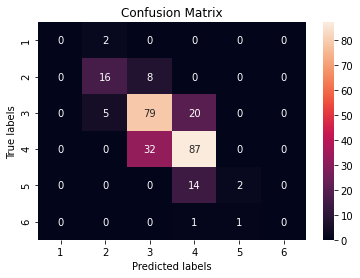

In [17]:
# create a better confusion matrix 
labels = [1,2,3,4,5,6]
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
# first argument is true values and second argument is the predicted values
sns.heatmap(cm, annot = True, ax = ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

This confusion matrix provides better visualization of the performance of the SVR model with clear labels.

#### Explanation on the confusion matrix 

 * aij indicates the cell that at ith row and jth column

Based on the confusion matrix above, a12, a64, and a65 show that my model did not successfully predict the essay with scores 1 and 6 correctly. Hence, the classification report states that the precision for predicting scores 1 and 6 is 0.00. Among all the classes, the model did the best when predicting the essay with scores 2 and 4. The precision for these two classes was almost the same, which are 0.70 and 0.71 for scores 2 and 4 respectively. It is interesting to know that the precision for the prediction of scores 3 and 5 are also almost the same, which is 0.66 and 0.67 respectively.

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.70      0.67      0.68        24
           3       0.66      0.76      0.71       104
           4       0.71      0.73      0.72       119
           5       0.67      0.12      0.21        16
           6       0.00      0.00      0.00         2

    accuracy                           0.69       267
   macro avg       0.46      0.38      0.39       267
weighted avg       0.68      0.69      0.67       267



C:\Users\Andy Kuah Jia Chen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Explanation of the warning
Based on my understanding, I think the reason for the warning to happen is because the model did not predict any data for certain labels, for example, 1 and 6. Hence, when calculating the precision and f1-score, zero division may occur during the calculation, therefore precision and f1-score for these labels ( which is 1 and 6 ) is set to 0.0 and this warning is printed out.

In [19]:
# print the accuracy score of my model
print(metrics.accuracy_score(y_test, y_pred))

0.6891385767790262


Based on the classification report above, shows that the accuracy of this model is around 0.69. Besides that, there is much information also displayed in this report, such as the precision of each score, the f1-score for each score, and so on.

#### Quadratic Weighted Kappa

In [20]:

qwk = cohen_kappa_score(y_test, y_pred, weights = "quadratic") 
qwk

0.7019470404984423

#### Explanation for Quadratic Weighted Kappa
Quadratic Weighted Kappa is used to measure the agreement between two ratings, in this case, it is measuring the agreement between the actual score of the dataset and the prediction score. QWK can vary from 0 to 1.0. Quadratic Weighted Kappa is kind of like the value of accuracy for the classifier, it tells people how good your classifier's performance is. For my classifier, the QWK is 0.70. 

Usually, a 0.6 -0.8 qwk score would be considered a good qwk score, if the qwk score is in the range of 0.8 - 1.0, the model is already considered almost perfect. If the qwk was below 0.6, the model needs some improvement. If the model has a negative qwk score, it indicates the model has no agreement with the dataset. 

The quadratic weighted kappa for this model is around 0.70.

# Kaggle Submission

#### Read "FIT1043-Essay-Features-Submission.csv"

In [21]:
KaggleSubmission = pd.read_csv(r"C:\Users\Andy Kuah Jia Chen\Downloads\FIT1043 Assignments\Prediction-Of-Essay_Scores\data\FIT1043-Essay-Features-Submission.csv")
KaggleSubmission.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607


#### Feature Engineering

In [22]:
KaggleSubmission['Total_punctuations'] = KaggleSubmission['commas'] + KaggleSubmission['apostrophes'] + \
KaggleSubmission['sentences'] + KaggleSubmission['questions']
KaggleSubmission['Sum_of_POS_prompt_synonym'] = KaggleSubmission['POS'] + KaggleSubmission['prompt_words'] + \
KaggleSubmission['synonym_words']

#### Feature Selection

In [23]:
feature_cols = ['Sum_of_POS_prompt_synonym','sentences','Total_punctuations','avg_word_sentence','unstemmed','stemmed'
                ,'prompt_words/total_words','avg_word_length','words','chars']
X = KaggleSubmission[feature_cols] #  features

#### Normalization

In [24]:
X = sc.transform(X)

#### Predict the score

In [25]:
y_new_pred = svr.predict(X)

Use the model to do the prediction.

In [26]:
y_new_pred[0:10] # print the first 20 prediction values

array([4.08493773, 3.32313312, 3.55926438, 3.64299129, 3.8292744 ,
       3.40488482, 3.29344848, 3.42672987, 3.23727063, 2.54565545])

In [27]:
for i in range(len(y_new_pred)):  # rounding all prediction values 
    y_new_pred[i] = round(y_new_pred[i])

Since the prediction values are all float numbers, I had to convert them to an integer by rounding all the values using a for loop.

In [28]:
kaggle_pred = []
for i in range(len(y_new_pred)):  # convert all prediction values from float to integer
    kaggle_pred.append(int(y_new_pred[i])) # example, from 4.0 to 4
kaggle_pred[0:10] # print the first 10 values

[4, 3, 4, 4, 4, 3, 3, 3, 3, 3]

#### Read "99999999-YourName-1.csv"

In [29]:
SubmissionFile = pd.read_csv(r"C:\Users\Andy Kuah Jia Chen\Downloads\FIT1043 Assignments\Prediction-Of-Essay_Scores\data\99999999-YourName-1.csv")
SubmissionFile.head() # print the first 5 rows

,essayid,score
0,1623,NaN
1,1143,NaN
2,660,NaN
3,1596,NaN
4,846,NaN


#### Output the predicted score to the score column

In [30]:
SubmissionFile['score'] = kaggle_pred

In [31]:
SubmissionFile.head() # print the first 5 rows

,essayid,score
0,1623,4
1,1143,3
2,660,4
3,1596,4
4,846,4


#### Output the two columns to a new CSV file for Kaggle submission

In [32]:
df = SubmissionFile
df.to_csv(r"C:\Users\Andy Kuah Jia Chen\Downloads\FIT1043 Assignments\Prediction-Of-Essay_Scores\data\32286988-KuahJiaChen.csv",index = False)

# Conclusion

Overall, this assignment provides clear visualization and a great experience for me to understand how predictive analytics works. I had to use SVR as the model to do prediction. In my opinion, the most difficult part is to figure out the best features used for prediction. The feature columns are one of the major factors that affect the performance of the model significantly, hence the right essay features would be extremely important to improve the model. Besides that, I also realized the importance of the confusion matrix and classification report, as these enable people to visualize the performance of the model in a much more detailed way. In this assignment, I had a better understanding of the meaning of supervised learning, the notion of labeled data, the difference between training and testing dataset, the difference between binary and multi-class classification, what is Support Vector Machine/Regression, and the kernel of SVM/SVR. I also had the chance to experience the Kaggle competition due to this assignment.

# References

1. Raschka, S. (2016). How to Select Support Vector Machine Kernels. KDnuggets. https://www.kdnuggets.com/2016/06/select-support-vector-machine-kernels.html
2. Wikipedia contributors. (2019, October 2). Polynomial kernel. Wikipedia. https://en.wikipedia.org/wiki/Polynomial_kernel#:%7E:text=In%20machine%20learning%2C%20the%20polynomial,learning%20of%20non%2Dlinear%20models.
3. Awasthi, S. (2020, December 17). Seven Most Popular SVM Kernels. Dataaspirant. https://dataaspirant.com/svm-kernels/#t-1608054630718